#### Il s'agit ici d'un TP de classification d'image manuscrite en utilisant les reseaux de neurones

Nous allons utiliser le dataset de disponible sur Keras

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers, models
from keras.utils import to_categorical
import tensorflow as tf

2025-11-28 11:36:49.401185: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-28 11:36:59.455756: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-28 11:37:37.686466: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


#### Dans le tp nous utilisons les donnees du mnsit importe de keras.dataset

#### Apres chargement, 


In [2]:
data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


##### on constate que nous avons au total 70000 images de taille 28*28
    Train images shape: (60000, 28, 28)
    Test images shape: (10000, 28, 28)

    Les dimensions de l'image sont de 28x28 pixels

#### Nous avons afficher cinq images en niveau de gris avec leur label au dessus

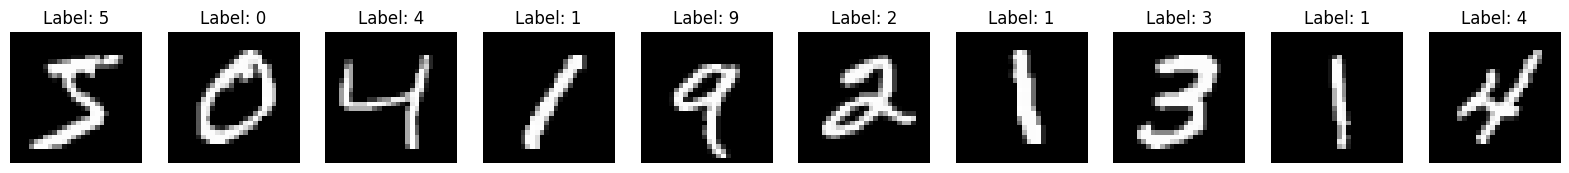

In [3]:
# Affichage de 5 images d'entraînement avec leurs étiquettes
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


##### Ensuite nous avons afficher la matrice representant la premiere image en niveau de gris

In [4]:
# Affichage de deux images sous forme de tableau de pixels
import numpy as np
print("Image 1 pixel values:")
print(np.array_str(train_images[0], max_line_width=150))

Image 1 pixel values:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 

In [5]:
# sns.set(style='white', context='notebook', palette='dark') # Set seaborn style
# #sns.countplot(x=train_labels.argmax(axis=1), palette='dark') # Use countplot with a color palette
# plt.title('Distribution des étiquettes d\'entraînement') # Added a title
# plt.xlabel('Classe') # Added x-axis label
# plt.ylabel('Nombre d\'images') # Added y-axis label
# plt.xticks(range(10)) # Ensure all classes are shown on x-axis
# plt.show() # Explicitly show the plot

On remarque que chaque image est représentée par une matrice 28x28, 
où chaque élément de la matrice correspond à l'intensité du pixel (valeur entre 0 et 255). 
Une valeur de 0 représente un pixel noir, tandis qu'une valeur de 255 représente un pixel blanc. 
Les valeurs intermédiaires représentent différentes nuances de gris.
Ces valeurs sont comprises entre 0 et 255 car elles sont stockées sous forme d'entiers non signés sur 8 bits (uint8),

Ainsi donc en phase de prétraitement, nous avons décider de normaliser les valeurs afin de les mettre entre 0 et 1 pour que notre modèle soit pas biasé par les valeurs
Pour se faire, étant donné que les intensités de nos images sont codés sur 8 bits, 
    val_Min = 0
    val_Max = 255
Nous avons donc diviser les valeurs de nos données d'entrainement et de test par 255
Cet type de normalisation à été utilisé, car les niveaux d'intensité ne sont pas négatifs

#### Pretraitement des donnees
    - Normalisation des pixels entre 0 et 1
    - Redimensionnement des images

In [6]:
# Normalisation des pixels entre 0 et 1
# Ici nous divisons chaque pixel par 255.0 car 
# min = 0 et max = 255 dans les images en niveaux de gris sur 8 bits
# pour obtenir des valeurs flottantes entre 0 et 1 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
# Nous effectuons cette opération pour améliorer la convergence du modèle lors de l'entraînement et pour éviter les problèmes liés aux différences d'échelle entre les caractéristiques des données.

#### 
Nous allons redimensionner les images de 28x28 en un vecteur de 784 (28*28) 
qui etait de type (60000, 28, 28) pour les images d'entraînement en 
(60000, 23, 28, 1) afin de les rendre compatibles avec les couches denses du réseau de neurones.
pour ne pas perdre l'information de la structure spatiale des images, nous ajoutons une dimension supplémentaire pour représenter le canal de couleur (1 pour les images en niveaux
de gris) et 3 canaux pour les images en couleur (RGB).

In [7]:
# Reshape des données pour les adapter à l'entrée du réseau de neurones convolutif
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [8]:
print(f"Train images reshaped: {train_images.shape}")
print(f"Test images reshaped: {test_images.shape}")

Train images reshaped: (60000, 28, 28, 1)
Test images reshaped: (10000, 28, 28, 1)


Nous avons ensuite procceder à l'encodage des labels 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [9]:
# Encodage one-hot des étiquettes
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Nous avons ensuite construit notre réseau de neurones convolutionnel

In [10]:
# Conception du CNN 
from keras import models
from keras import layers
# Initialisation du modèle séquentiel
model = models.Sequential()
# Ajout d'une première couche de convolution
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Ajout d'une couche de pooling pour réduire la dimensionnalité
model.add(layers.MaxPooling2D((2, 2)))
# Ajout d'une deuxième couche de convolution
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Ajout d'une couche de pooling pour réduire la dimensionnalité
model.add(layers.MaxPooling2D((2, 2)))
# Ajout d'une troisième couche de convolution
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Aplatir les cartes de caractéristiques en un vecteur avant de les passer aux couches entièrement connectées
model.add(layers.Flatten())
# pour desactiver aléatoirement 50% des neurones pendant l'entraînement afin de réduire le surapprentissage
model.add(layers.Dropout(0.5))
# couche entièrement connectée
model.add(layers.Dense(64, activation='relu'))
# couche de sortie avec activation softmax pour la classification multi-classes
model.add(layers.Dense(10, activation='softmax'))
model.summary()


/home/bona/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-28 11:37:55.802425: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9271 - loss: 0.2291 - val_accuracy: 0.9821 - val_loss: 0.0598
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9749 - loss: 0.0798 - val_accuracy: 0.9837 - val_loss: 0.0543
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9812 - loss: 0.0589 - val_accuracy: 0.9891 - val_loss: 0.0357
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9840 - loss: 0.0500 - val_accuracy: 0.9896 - val_loss: 0.0389
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9870 - loss: 0.0421 - val_accuracy: 0.9886 - val_loss: 0.0387
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9877 - loss: 0.0385 - val_accuracy: 0.9912 - val_loss: 0.0323
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.9888 - val_loss: 0.0446
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9895 -

#### En utilisant 3 couches des convolutions ayant comme un noyau de convolution (3x3) avec 1 caché et 1 couche de sortie avec comme optimizer : adam, et un dropout à .5

Nous obtenons les résultats suivants : 

    à la 10 époque sur les données d'entraimenent
        - train 
            - accuracy = 0.9923
            - loss = 0.0244
        - validation
            - accuracy = 0.9931
            - loss = 0.0251
    - Les performances sur les données de test : 
        - accuracy = 0.9929
        - loss = 0.0210

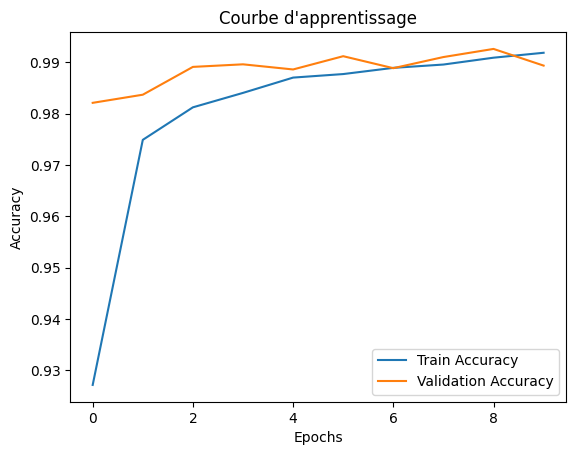

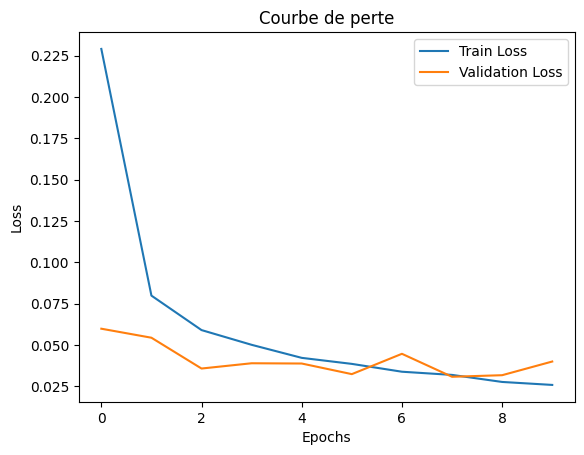

In [12]:
# Affichage des courbes d'apprentissage sur les données d'entraînement et de validation
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Courbe de perte')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:

# Évaluer la performance sur les données de test :
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9909 - loss: 0.0272
Test accuracy: 0.9908999800682068


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


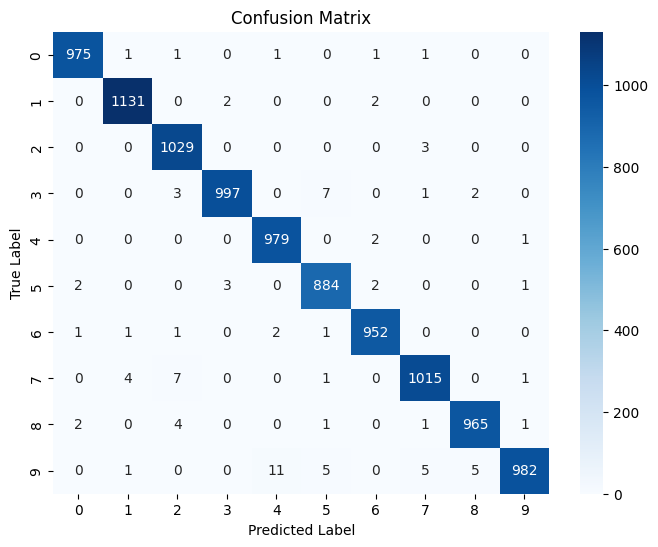

In [14]:
# Affichage de la matrice de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[i for i in range(10)],
            yticklabels=[i for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### En utilisant 2 couches des convolutions avec 1 couches caché avec comme optimizer : nadam, nous obtenons comme 
    à la 10 époque sur les données d'entraimenent
        - train 
            - accuracy = 0.9980
            - loss = 0.006
        - validation
            - accuracy = 0.98
            - loss = 0.0643
    - Les performances sur les données de test : 
        - accuracy = 0.9883
        - loss = 0.0549

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


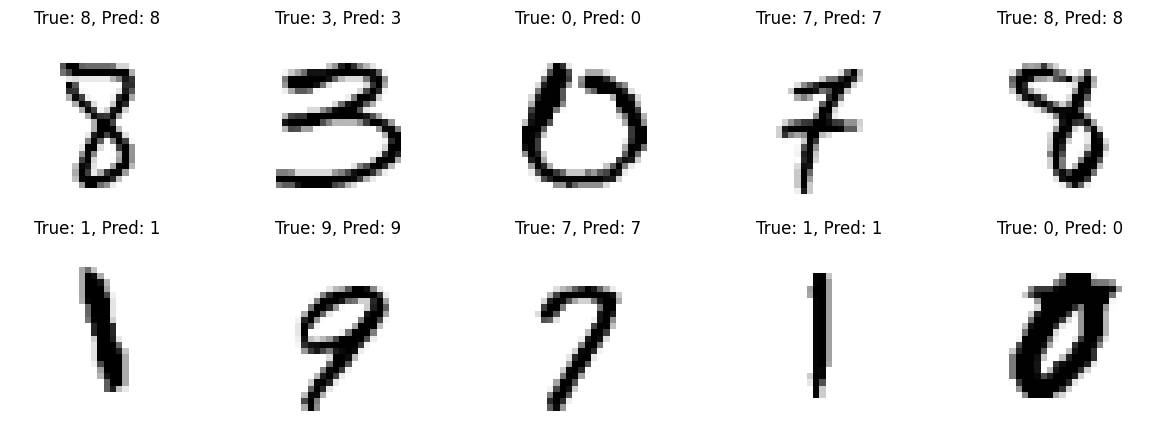

In [15]:
# Quelles prediction sur des donnees des test en affichant les images avec leurs predictions et valeurs reelles
plt.figure(figsize=(15, 5))
for i in range(10):
    index = np.random.choice(len(test_images), size=10, replace=False)
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index[i]].reshape(28, 28), cmap='binary')
    true_label = np.argmax(test_labels[index[i]])
    predicted_label = np.argmax(model.predict(test_images[index[i]].reshape(1, 28, 28, 1)))
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
plt.show()

In [16]:
import os
# 2. Export en TensorFlow Lite (.tflite) → parfait et ultra-rapide pour Flask
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optionnel mais fortement recommandé : quantification 8-bit (×4 plus petit, presque pas de perte de précision sur MNIST)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

# Création du dossier s’il n’existe pas
os.makedirs("export", exist_ok=True)

with open("export/mnist_cnn.tflite", "wb") as f:
    f.write(tflite_model)

print(f"Modèle TensorFlow Lite exporté → export/mnist_cnn.tflite ({os.path.getsize('export/mnist_cnn.tflite') // 1024} Ko)")
# → typiquement 80–100 Ko seulement ! Ultra rapide en Flask

INFO:tensorflow:Assets written to: /tmp/tmpwf1_5la9/assets


INFO:tensorflow:Assets written to: /tmp/tmpwf1_5la9/assets


Saved artifact at '/tmp/tmpwf1_5la9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  127888596576080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596577232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596575120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596574736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596579536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596580304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596579152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596578576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596580496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127888596580688: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1764326607.193217   16289 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1764326607.193254   16289 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-11-28 11:43:27.193796: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpwf1_5la9


Modèle TensorFlow Lite exporté → export/mnist_cnn.tflite (101 Ko)


2025-11-28 11:43:27.195326: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-11-28 11:43:27.195367: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpwf1_5la9
I0000 00:00:1764326607.203279   16289 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
2025-11-28 11:43:27.204600: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-11-28 11:43:27.268620: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpwf1_5la9
2025-11-28 11:43:27.290450: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 96673 microseconds.
2025-11-28 11:43:27.311257: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
